## City Of Pittsburgh Parks

### Links to Datasets:
1. [Parks Dataset](https://data.wprdc.org/dataset/parks1/resource/bb57d0a7-e8ee-4218-8906-0dedc903038c?inner_span=True)
2. [Neighborhoods Dataset](https://data.wprdc.org/dataset/neighborhoods2)

### Metric: Environment and Accessibility

Neighborhoods with parks enjoy a myriad of benefits that significantly enhance residents' quality of life. Parks serve as communal hubs, fostering social connections and a sense of community, while also providing spaces for physical activities that promote both physical and mental well-being. My metric is Envirement/accessibility we will use this metric to figure out what neighborhoods have the most parks.

# Data Exploration


First we see what neighborhood has the most amount of parks. The more Parks means the more accessibility for the community making it a better place. We will take the top 10 for parks and see which neighborhood has the most parks.

In [9]:
import pandas as pd

# Load Parks CSV
parks_df = pd.read_csv('Parks.csv')

# Filter rows where 'type' is 'Park'
parks_df = parks_df[parks_df['type'] == 'Park']

# Group the DataFrame by neighborhood and count the number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Find the top 10 neighborhoods with the most parks
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# Create a DataFrame with the top 10 neighborhoods and the maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})

# Randomize the order of the 'neighborhood' column in the top 10 parks DataFrame
top_10_parks_df = top_10_parks_df.sample(frac=1).reset_index(drop=True)

# Display all information for the top 10 neighborhoods with the most parks
result_df = pd.merge(parks_df, top_10_parks_df, on='neighborhood')
result_df



,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,max_parks
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197,6
1,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855,6
2,23,1990832198,Beechview Healthy Active Living Center Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.410721,-80.024362,6
3,151,1572177418,Pauline Park,Park,Parks - Southern,NaN,Beechview,4,19,42003192000,5,19,6,4-28,40.404576,-80.025946,6
4,182,1504989458,Tropical Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003191600,5,19,6,4-28,40.422261,-80.023991,6
5,186,1952724428,Vanucci Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414811,-80.017843,6
6,11,1928748922,Arlington Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418283,-79.975050,6
7,37,712782057,Cobden Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.419338,-79.968198,6
8,55,303472511,Eleanor Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421408,-79.972879,6
9,132,375307767,Monongahela Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421699,-79.966333,6


In [22]:
import pandas as pd

# Load Parks CSV
parks_df = pd.read_csv('Parks.csv')

# Filter rows where 'type' is 'Park'
parks_df = parks_df[parks_df['type'] == 'Park']

# Group the DataFrame by neighborhood and count the number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Find the top 10 neighborhoods with the most parks
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# Create a DataFrame with the top 10 neighborhoods and the maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})

# Sort the DataFrame by the number of parks in descending order
top_10_parks_df = top_10_parks_df.sort_values(by='max_parks', ascending=False).reset_index(drop=True)

# Use groupby to get unique mapping of neighborhoods to longitude and latitude
neighborhood_coords = parks_df.groupby('neighborhood')[['longitude', 'latitude']].first()

# Merge with top_10_parks_df
top_10_parks_df = pd.merge(top_10_parks_df, neighborhood_coords, left_on='neighborhood', right_index=True)

# Display the result using .head()
top_10_parks_df.head(10)


,neighborhood,max_parks,longitude,latitude
0,Beechview,6,-80.028197,40.408118
1,South Side Slopes,6,-79.975050,40.418283
2,Troy Hill,5,-79.988924,40.458690
3,Hazelwood,5,-79.945672,40.403974
4,Mount Washington,5,-80.008521,40.432901
5,Elliott,4,-80.043455,40.439462
6,Sheraden,4,-80.066199,40.459298
7,Marshall-Shadeland,4,-80.030594,40.462518
8,East Liberty,4,-79.918745,40.462065
9,Brighton Heights,3,-80.029606,40.485600


Now before we map these parks and make a bar graph i'll add the neighborhoods with 0 parks. These neighborhoods will lack a communal social envirement for their neighborhood dropping them from the best neighborhoods.

In [12]:
import pandas as pd

neighborhood_df = pd.read_csv('neighborhoods.csv')

# Load Parks CSV
parks_df = pd.read_csv('Parks.csv')

# Merge the two dataframes on the common column
merged_df = pd.merge(neighborhood_df, parks_df, left_on='hood', right_on='neighborhood', how='left')

# Create a new column indicating whether the neighborhood has a park or not
merged_df['has_park'] = merged_df['name'].notnull()

# Separate into two sets
neighborhoods_with_parks = merged_df[merged_df['has_park'] == True]
neighborhoods_without_parks = merged_df[merged_df['has_park'] == False]

# Display or save the results
print("Neighborhoods without Parks:")
print(neighborhoods_without_parks[['hood', 'neighborhood']])



Neighborhoods without Parks:
                     hood neighborhood
8               Knoxville          NaN
15             Glen Hazel          NaN
36      Northview Heights          NaN
39      Arlington Heights          NaN
68         Allegheny West          NaN
86              Overbrook          NaN
87             Friendship          NaN
99         East Allegheny          NaN
118        Chartiers City          NaN
160             Ridgemont          NaN
166           South Shore          NaN
167            Mt. Oliver          NaN
168  California-Kirkbride          NaN
187             St. Clair          NaN
188               Chateau          NaN
189             Shadyside          NaN
190           Summer Hill          NaN


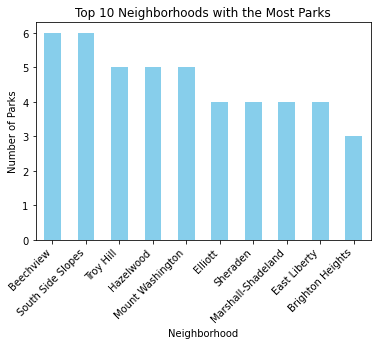

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Parks CSV
parks_df = pd.read_csv('Parks.csv')

# Filter rows where 'type' is 'Park'
parks_df = parks_df[parks_df['type'] == 'Park']

# Group the DataFrame by neighborhood and count the number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Find the top 10 neighborhoods with the most parks
top_10_neighborhoods = neighborhood_park_counts.head(10)

# Create a bar graph directly from the DataFrame
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Parks')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45, ha='right')
plt.show()


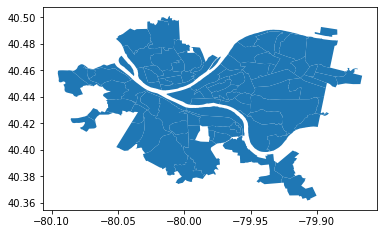

In [6]:
import geopandas as gpd

# Load neighborhood GeoDataFrame from the same directory
neighborhood_map = gpd.read_file("Neighborhoods_.shp")

# Plot the neighborhood map
neighborhood_map.plot()


